# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import random
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Importing Dataset

In [2]:
!gdown --id 1UFkF9wWkJIS2BvnhCcfLgEbrkh2L3r4j

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UFkF9wWkJIS2BvnhCcfLgEbrkh2L3r4j
To: /content/animal_image.zip
100% 30.3M/30.3M [00:00<00:00, 43.1MB/s]


In [3]:
!unzip animal_image.zip

Archive:  animal_image.zip
   creating: animal_image/test/
   creating: animal_image/test/animal chicken/
  inflating: animal_image/test/animal chicken/0U5DJ4AHL7U8.jpg  
  inflating: animal_image/test/animal chicken/0YRRH5UO983S.jpg  
  inflating: animal_image/test/animal chicken/17ZH2WHTIPL8.jpg  
  inflating: animal_image/test/animal chicken/1O9LZD4GDLEG.jpg  
  inflating: animal_image/test/animal chicken/1OX6JD87ZL6M.jpg  
  inflating: animal_image/test/animal chicken/1WHCYYP4QBBB.jpg  
  inflating: animal_image/test/animal chicken/1ZLB7IELNMCD.jpg  
  inflating: animal_image/test/animal chicken/21AEDSI4YQ9L.jpg  
  inflating: animal_image/test/animal chicken/2GGVG9VUE5VP.jpg  
  inflating: animal_image/test/animal chicken/2IH2F7SXSTFS.jpg  
  inflating: animal_image/test/animal chicken/2MD30734HGEK.jpg  
  inflating: animal_image/test/animal chicken/30XSIDP797YK.jpg  
  inflating: animal_image/test/animal chicken/37ROYA9ANCBW.jpg  
  inflating: animal_image/test/animal chicken/3LM

In [4]:
image_shape = (224,224,3)

# Train Test Validation

In [5]:
train_path = "animal_image/train"
test_path = "animal_image/test"
val_path = "animal_image/val"

In [6]:
x_train = []
num_samples_per_folder = 332  # Specify the number of samples to take from each folder

for folder in os.listdir(train_path):
  # Create the full path to the current subdirectory
  sub_path = os.path.join(train_path, folder)

  # Get a list of all images in the current subdirectory and shuffle them
  image_list = os.listdir(sub_path)
  random.shuffle(image_list)

  # Loop through a specified number of images from the shuffled list
  for img in image_list[:num_samples_per_folder]:

    # Create the full path to the current image and read it into memory
    image_path = os.path.join(sub_path, img)
    img_arr = cv2.imread(image_path)

    # Resize the image to a standard size (224x224)
    img_arr = cv2.resize(img_arr, (224, 224))

    # Add the image array to the training data list
    x_train.append(img_arr)


In [7]:
x_test = []
num_samples_per_folder = 115  

for folder in os.listdir(test_path):
  # Create the full path to the current subdirectory
  sub_path = os.path.join(test_path, folder)

  # Get a list of all images in the current subdirectory and shuffle them
  image_list = os.listdir(sub_path)
  random.shuffle(image_list)

  # Loop through a specified number of images from the shuffled list
  for img in image_list[:num_samples_per_folder]:

    # Create the full path to the current image and read it into memory
    image_path = os.path.join(sub_path, img)
    img_arr = cv2.imread(image_path)

    # Resize the image to a standard size (224x224)
    img_arr = cv2.resize(img_arr, (224, 224))

    # Add the image array to the test data list
    x_test.append(img_arr)


In [8]:
x_val = []
num_samples_per_folder = 52  

for folder in os.listdir(val_path):
  # Create the full path to the current subdirectory
  sub_path = os.path.join(val_path, folder)

  # Get a list of all images in the current subdirectory and shuffle them
  image_list = os.listdir(sub_path)
  random.shuffle(image_list)

  # Loop through a specified number of images from the shuffled list
  for img in image_list[:num_samples_per_folder]:

    # Create the full path to the current image and read it into memory
    image_path = os.path.join(sub_path, img)
    img_arr = cv2.imread(image_path)

    # Resize the image to a standard size (224x224)
    img_arr = cv2.resize(img_arr, (224, 224))

    # Add the image array to the validation data list
    x_val.append(img_arr)


In [9]:
train_x = np.array(x_train)
test_x = np.array(x_test)
val_x = np.array(x_val)

train_x = train_x/255.0
test_x = test_x/255.0
val_x = val_x/255.0

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

target_size = (224, 224)
batch_size = 32
class_mode = 'sparse'

training_set = train_datagen.flow_from_directory(train_path,
target_size = target_size,
batch_size = batch_size,
class_mode = class_mode)

test_set = test_datagen.flow_from_directory(test_path,
target_size = target_size,
batch_size = batch_size,
class_mode = class_mode)

val_set = val_datagen.flow_from_directory(val_path,
target_size = target_size,
batch_size = batch_size,
class_mode = class_mode)

Found 664 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [11]:
train_y = training_set.classes
test_y = test_set.classes
val_y = val_set.classes

In [12]:
training_set.class_indices

{'animal chicken': 0, 'animal duck': 1}

In [13]:
train_y.shape, test_y.shape, val_y.shape

((664,), (230,), (104,))

# Model

In [14]:
# Load the pre-trained VGG-19 model with imagenet weights, and exclude the top layer
vgg = VGG19(input_shape=image_shape, weights='imagenet', include_top=False)

# Freeze all the layers of the pre-trained VGG-19 model so they are not trainable
for layer in vgg.layers:
    layer.trainable = False

# Flatten the output of the pre-trained model
x = Flatten()(vgg.output)

# Add a new output layer with softmax activation for multi-class classification
prediction = Dense(2, activation='softmax')(x)

# Create a new model with the VGG-19 model as the input and the new output layer
model = Model(inputs=vgg.input, outputs=prediction)

# Print a summary of the model architecture
model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [15]:
# Compiling the model with loss function, optimizer, and metrics
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

# Setting up early stopping to avoid overfitting of model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Fitting the model with training data, validation data, number of epochs, batch size, and early stopping
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x, val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,
  shuffle=True
)


Epoch 1/10
21/21 [==============================] - 520s 25s/step - loss: 0.7035 - accuracy: 0.6777 - val_loss: 0.7043 - val_accuracy: 0.7308
Epoch 2/10
21/21 [==============================] - 518s 25s/step - loss: 0.2852 - accuracy: 0.8660 - val_loss: 0.3457 - val_accuracy: 0.8654
Epoch 3/10
21/21 [==============================] - 523s 25s/step - loss: 0.1378 - accuracy: 0.9473 - val_loss: 0.3369 - val_accuracy: 0.8654
Epoch 4/10
21/21 [==============================] - 513s 25s/step - loss: 0.0913 - accuracy: 0.9834 - val_loss: 0.3376 - val_accuracy: 0.8750
Epoch 5/10
21/21 [==============================] - 500s 24s/step - loss: 0.0612 - accuracy: 0.9910 - val_loss: 0.4163 - val_accuracy: 0.8750
Epoch 6/10
21/21 [==============================] - 502s 24s/step - loss: 0.0485 - accuracy: 0.9970 - val_loss: 0.3559 - val_accuracy: 0.8654
Epoch 7/10
21/21 [==============================] - 500s 24s/step - loss: 0.0365 - accuracy: 0.9985 - val_loss: 0.3519 - val_accuracy: 0.8750
Epoch 

# Results

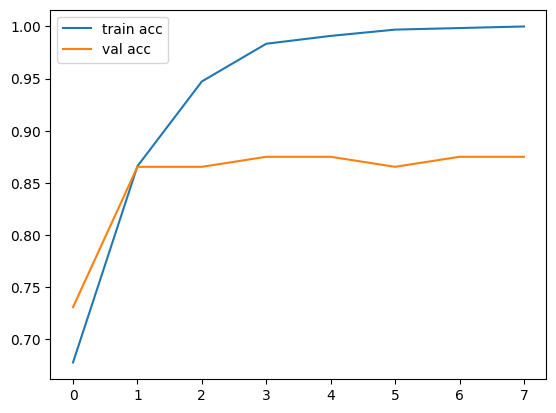

In [16]:
# Accuracy 
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [18]:
model.evaluate(test_x,test_y,batch_size=32)

8/8 [==============================] - 145s 18s/step - loss: 0.2139 - accuracy: 0.9087


[0.21389389038085938, 0.908695638179779]

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

In [21]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[108  14]
 [  7 101]]


In [ ]:
# Create empty lists to store the word labels of the test and predicted labels
y_test_word = []
y_pred_word = []

# Loop through each element in test_y and y_pred
for i in test_y:
  # If the element is 0, append 'chicken' to y_test_word, else append 'duck'
  if i == 0:
    y_test_word.append('chicken')
  else:
    y_test_word.append('duck')

for i in y_pred:
  # If the element is 0, append 'chicken' to y_pred_word, else append 'duck'
  if i == 0:
    y_pred_word.append('chicken')
  else:
    y_pred_word.append('duck')


In [23]:
# Display Subplots
def disp_subplots(image, shape, titles, sup_title, axes, figsize, cmap=None):
  fig, ax = plt.subplots(shape[0], shape[1], figsize=figsize)
  try:
    ax = ax.ravel()
  except:
    pass
    
  for i in range(len(image)):
    if cmap is None:
      ax[i].imshow(image[i])
    else:
      ax[i].imshow(image[i], cmap=cmap)

    if axes[i] is None:
      ax[i].set_xticks([])
      ax[i].set_yticks([])

    if titles[i] is not None:
      ax[i].set_title(titles[i])

  if sup_title is not None:
    fig.suptitle(sup_title, fontsize=18)
  plt.show()

In [24]:
# set random seed for reproducibility
random.seed(40)

# randomly select 9 images from the test set
image_idx = random.sample(range(len(y_pred)), 9)

# initialize empty lists to store images and titles
images=[]
titles=[]

# iterate over the selected image indices
for idx in image_idx:
    # append the actual and predicted labels as a title
    titles.append(f'Actual Label:{y_test_word[idx]}, Predicted Label:{y_pred_word[idx]}')
    # append the selected image, converted to RGB format
    images.append(cv2.cvtColor(x_test[idx], cv2.COLOR_BGR2RGB))


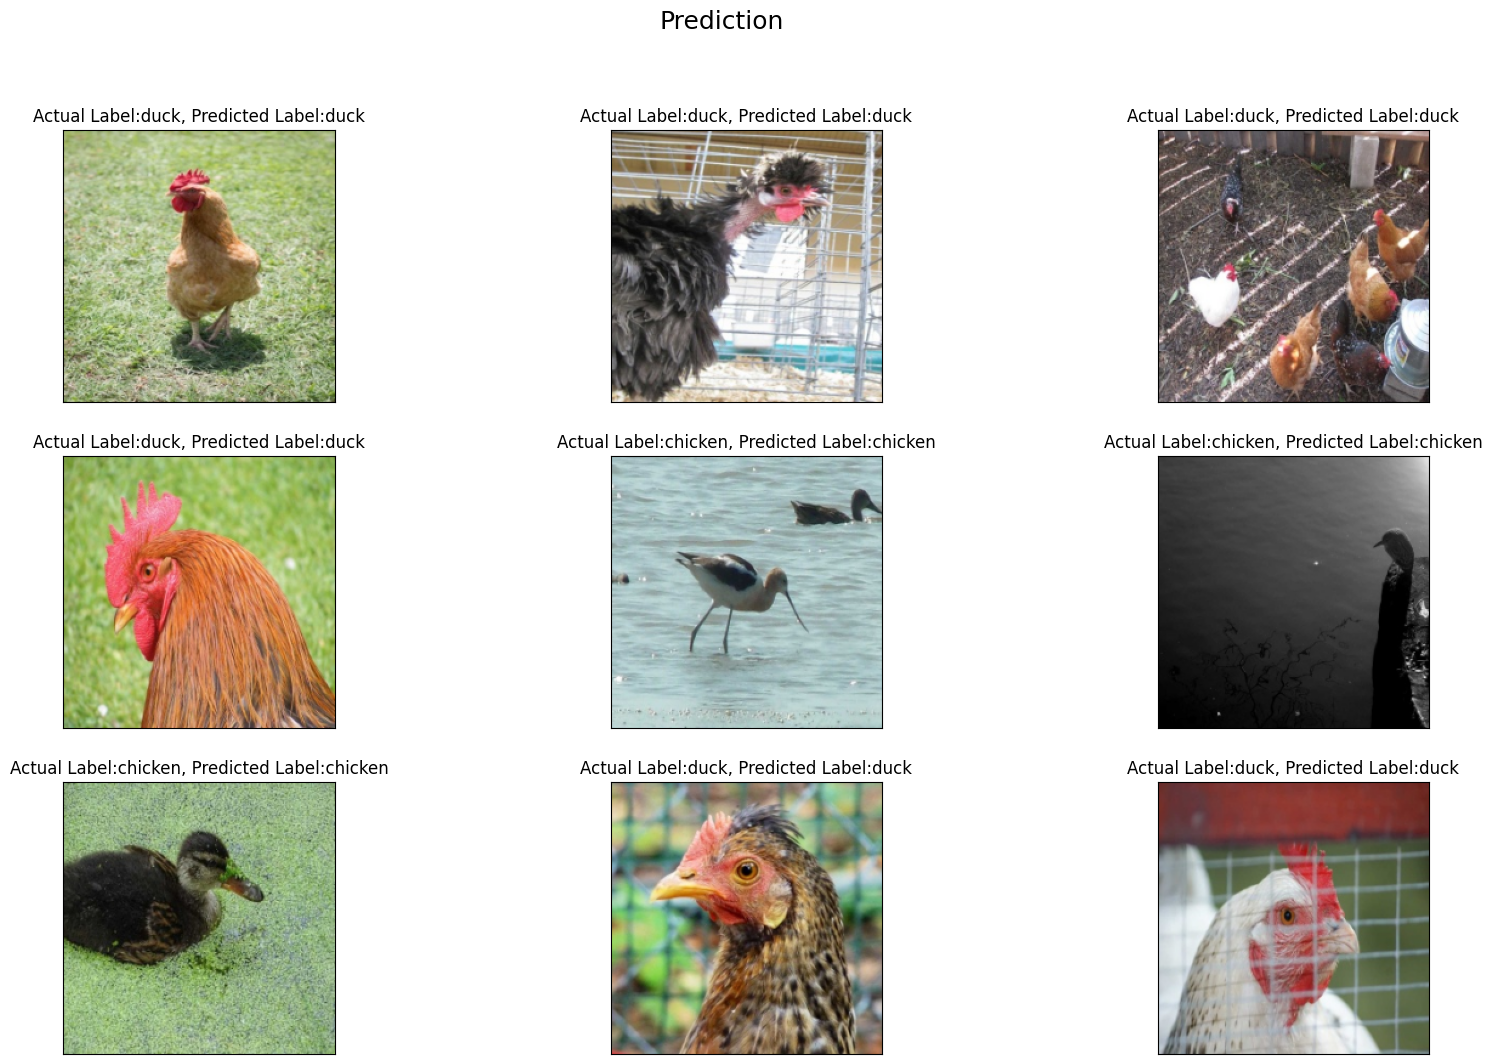

In [25]:
disp_subplots(images, (3,3), titles, 'Prediction', [None]*9, (20,12), cmap='gray')